In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

train_df = pd.read_csv('https://raw.githubusercontent.com/Navya8281/Mini-project/refs/heads/main/resampled_autism_screening.csv')
print(train_df.head())
df = pd.read_csv('https://raw.githubusercontent.com/Navya8281/Mini-project/refs/heads/main/autism_screening.csv')

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender jundice       ethnicity autism  \
0         1         0          0  ...       f      no  White-European     no   
1         1         0          1  ...       m      no          Latino    yes   
2         1         1          1  ...       m     yes          Latino    yes   
3         1         0          1  ...       f      no  White-European    yes   
4         1         0          0  ...       f      no               ?     no   

   contry_of_res used_app_before result     age_desc relation Class/

Class/ASD
NO     515
YES    189
Name: count, dtype: int64


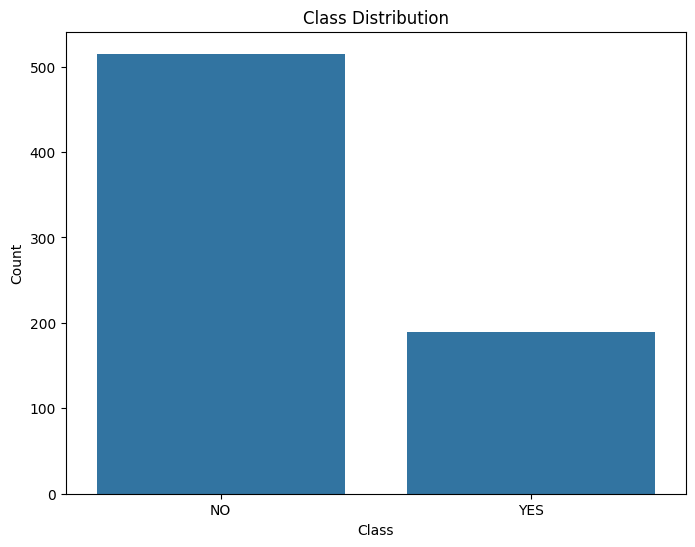

In [ ]:
#distribution chart before smoting
class_counts = df['Class/ASD'].value_counts()
print(class_counts)
plt.figure(figsize=(8, 6))
sb.countplot(x='Class/ASD', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Class/ASD
NO     515
YES    515
Name: count, dtype: int64


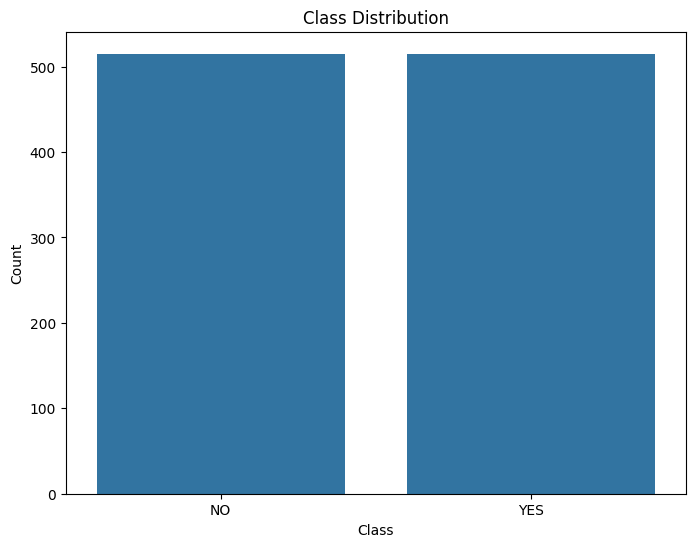

In [ ]:
#distribution chart after smoting
class_counts = train_df['Class/ASD'].value_counts()
print(class_counts)
plt.figure(figsize=(8, 6))
sb.countplot(x='Class/ASD', data=train_df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
print(train_df.shape)

(1030, 21)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         1030 non-null   int64  
 1   A2_Score         1030 non-null   int64  
 2   A3_Score         1030 non-null   int64  
 3   A4_Score         1030 non-null   int64  
 4   A5_Score         1030 non-null   int64  
 5   A6_Score         1030 non-null   int64  
 6   A7_Score         1030 non-null   int64  
 7   A8_Score         1030 non-null   int64  
 8   A9_Score         1030 non-null   int64  
 9   A10_Score        1030 non-null   int64  
 10  age              1028 non-null   float64
 11  gender           1030 non-null   object 
 12  jundice          1030 non-null   object 
 13  ethnicity        1030 non-null   object 
 14  autism           1030 non-null   object 
 15  contry_of_res    1030 non-null   object 
 16  used_app_before  1030 non-null   object 
 17  result        

In [ ]:
#count the number of missing values
question_mark_count = df.applymap(lambda x: str(x).count('?')).sum().sum()
print(f"Total number of '?' in the dataset before imputation: {question_mark_count}")

Total number of '?' in the dataset before imputation: 190


<ipython-input-7-014f70d8c19b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  question_mark_count = df.applymap(lambda x: str(x).count('?')).sum().sum()


In [ ]:
#replacing missing value in relation with mode
most_frequent_relation = train_df['relation'].mode()[0]
train_df['relation'] = train_df['relation'].replace('?', most_frequent_relation)

relation_counts = train_df['relation'].value_counts()
print(relation_counts)


relation
Self                        910
Parent                       61
Relative                     45
Others                        8
Health care professional      6
Name: count, dtype: int64


In [ ]:
#replacing missing value in ethinicity with mode
most_frequent_ethnicity = train_df['ethnicity'].mode()[0]
train_df['ethnicity'] = train_df['ethnicity'].replace('?', most_frequent_ethnicity)

ethnicity_counts = train_df['ethnicity'].value_counts()
print(ethnicity_counts)


ethnicity
White-European     537
Asian              154
Middle Eastern     103
Black               75
Others              46
South Asian         39
Latino              32
Hispanic            22
Pasifika            13
Turkish              8
others               1
Name: count, dtype: int64


In [ ]:
#replacing missing value in age with mean
mean_age = train_df['age'].mean()


train_df['age'].fillna(mean_age, inplace=True)


print(train_df['age'].isnull().sum())


0


<ipython-input-10-453190c90d54>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['age'].fillna(mean_age, inplace=True)


In [ ]:
print(train_df.isnull().sum())

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
jundice            0
ethnicity          0
autism             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [ ]:
#count the number of missing values after mean and mode imputation
question_mark_count_after_imputation = train_df.applymap(lambda x: str(x).count('?')).sum().sum()
print(f"Total number of '?' in the dataset after imputation: {question_mark_count_after_imputation}")

<ipython-input-12-3e5de03e2902>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  question_mark_count_after_imputation = train_df.applymap(lambda x: str(x).count('?')).sum().sum()


Total number of '?' in the dataset after imputation: 0


In [ ]:
#replacing yes with 1 and no with 0
train_df['Class/ASD'] = train_df['Class/ASD'].map({'YES': 1, 'NO': 0})

In [ ]:
train_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,jundice,ethnicity,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,no,White-European,no,United States,no,6,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,...,m,no,Latino,yes,Brazil,no,5,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,...,m,yes,Latino,yes,Spain,no,8,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,f,no,White-European,yes,United States,no,6,18 and more,Self,0
4,1,0,0,0,0,0,0,1,0,0,...,f,no,White-European,no,Egypt,no,2,18 and more,Self,0


In [ ]:
#seperating features and target
features = train_df.drop(['Class/ASD'],axis=1)
target = train_df['Class/ASD']
print(features.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score   age gender jundice       ethnicity autism  \
0         1         0          0  26.0      f      no  White-European     no   
1         1         0          1  24.0      m      no          Latino    yes   
2         1         1          1  27.0      m     yes          Latino    yes   
3         1         0          1  35.0      f      no  White-European    yes   
4         1         0          0  40.0      f      no  White-European     no   

   contry_of_res used_app_before  result     age_desc relation  
0  

In [ ]:
#categorical to numeric conversion using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in features.columns:
  if features[column].dtype == object:
    features[column] = le.fit_transform(features[column])

print(features.head())


   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score   age  gender  jundice  ethnicity  autism  \
0         1         0          0  26.0       0        0          9       0   
1         1         0          1  24.0       1        0          3       1   
2         1         1          1  27.0       1        1          3       1   
3         1         0          1  35.0       0        0          9       1   
4         1         0          0  40.0       0        0          9       0   

   contry_of_res  used_app_before  result  age_desc  relation  
0             64

In [ ]:
#data type of features after label encoding
import pandas as pd
attribute_data_types = []
for column in features.columns:
  attribute_data_types.append([column, features[column].dtype])

df_attribute_data_types = pd.DataFrame(attribute_data_types, columns=['Attribute', 'Data Type'])
print(df_attribute_data_types)

          Attribute Data Type
0          A1_Score     int64
1          A2_Score     int64
2          A3_Score     int64
3          A4_Score     int64
4          A5_Score     int64
5          A6_Score     int64
6          A7_Score     int64
7          A8_Score     int64
8          A9_Score     int64
9         A10_Score     int64
10              age   float64
11           gender     int64
12          jundice     int64
13        ethnicity     int64
14           autism     int64
15    contry_of_res     int64
16  used_app_before     int64
17           result     int64
18         age_desc     int64
19         relation     int64


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


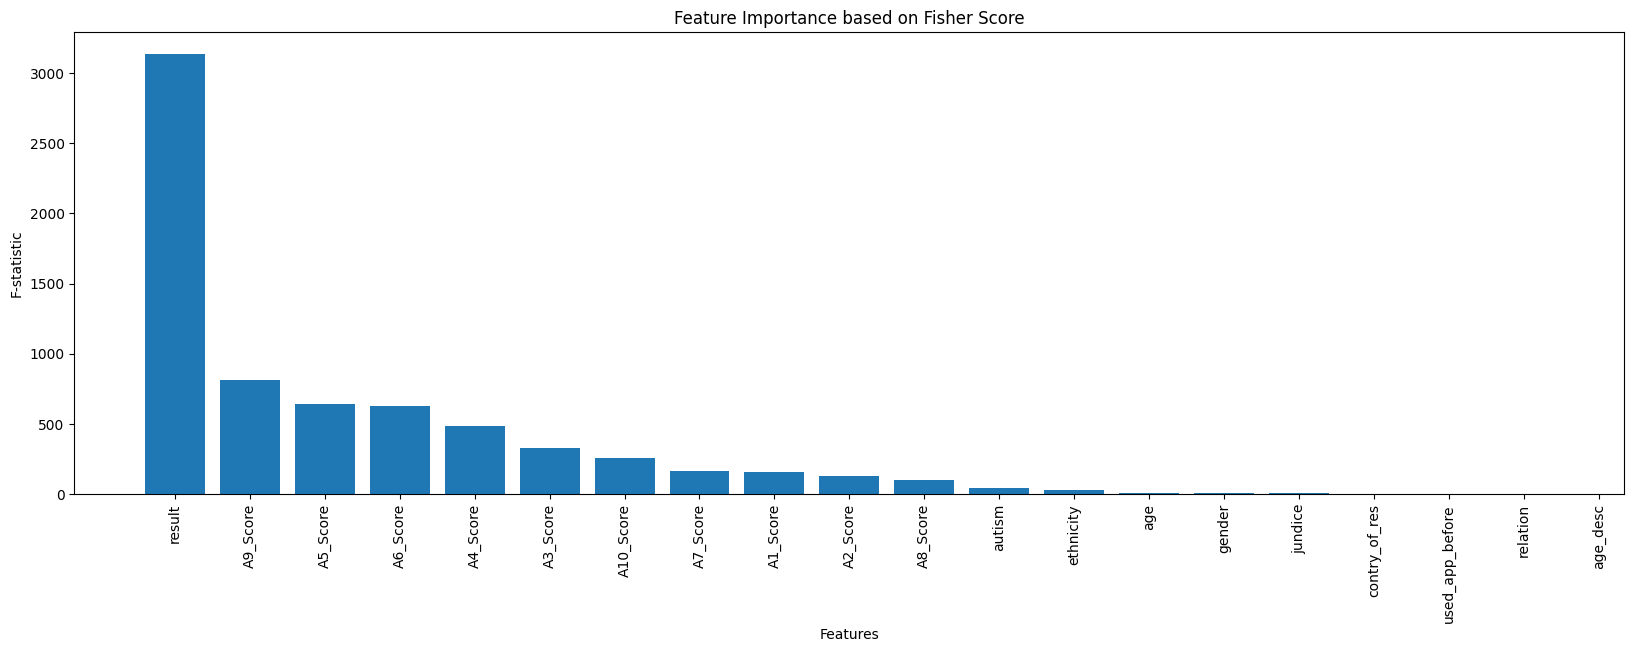

Selected features with Fisher score (top 11):
['result', 'A9_Score', 'A5_Score', 'A6_Score', 'A4_Score', 'A3_Score', 'A10_Score', 'A7_Score', 'A1_Score', 'A2_Score', 'A8_Score']


In [ ]:
#feature selection using fisher score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

f_statistic, p_values = f_classif(features, target)

feature_importance_fisher = pd.DataFrame({'feature': features.columns, 'f_statistic': f_statistic})

feature_importance_fisher = feature_importance_fisher.sort_values('f_statistic', ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(feature_importance_fisher['feature'], feature_importance_fisher['f_statistic'])
plt.xlabel('Features')
plt.ylabel('F-statistic')
plt.title('Feature Importance based on Fisher Score')
plt.xticks(rotation=90)
plt.show()

selected_features_fisher = feature_importance_fisher['feature'].tolist()[:11]

print("Selected features with Fisher score (top 11):")
print(selected_features_fisher)


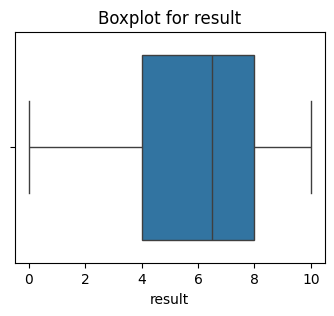

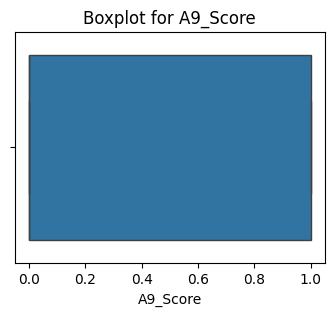

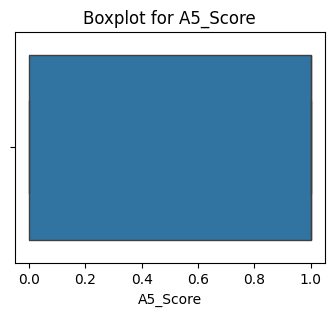

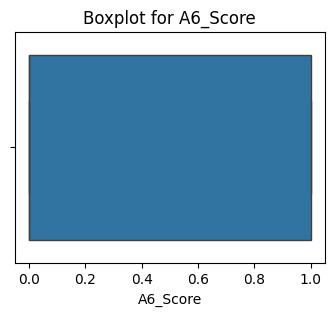

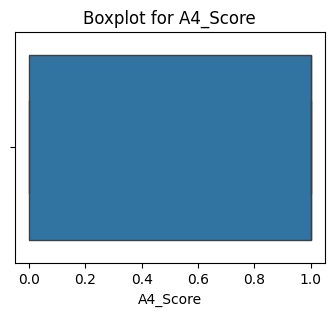

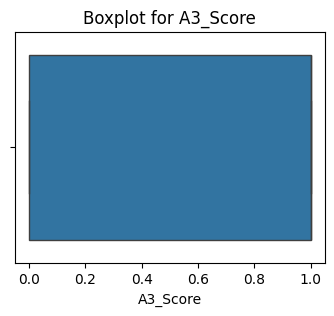

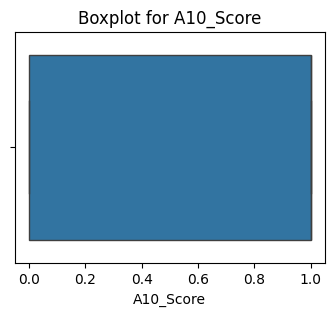

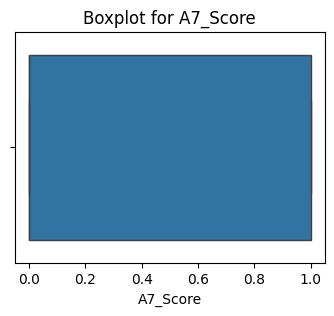

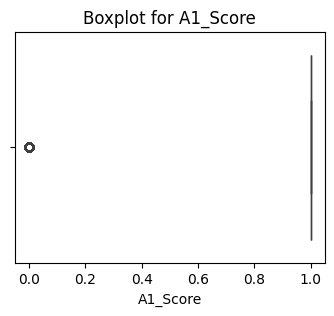

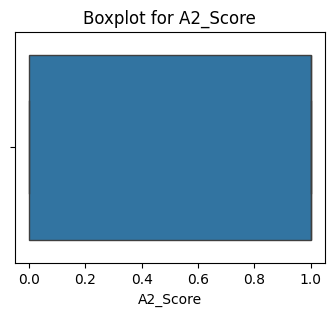

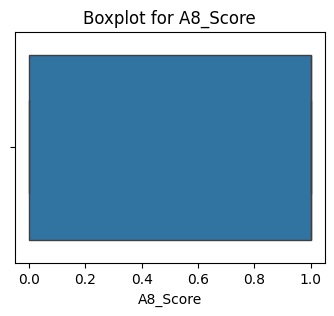

In [ ]:
#boxplot for detecting outlier
import matplotlib.pyplot as plt
import seaborn as sns

for feature in selected_features_fisher:
  plt.figure(figsize=(4, 3))
  sns.boxplot(x=features[feature])
  plt.title(f'Boxplot for {feature}')
  plt.show()


In [ ]:
#standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features[selected_features_fisher])

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.3, random_state=42, stratify=target)


In [ ]:
#model fitting
svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
#model prediction
y_pred = svm_classifier.predict(X_test)
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       154

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309

Confusion Matrix:
 [[155   0]
 [  0 154]]


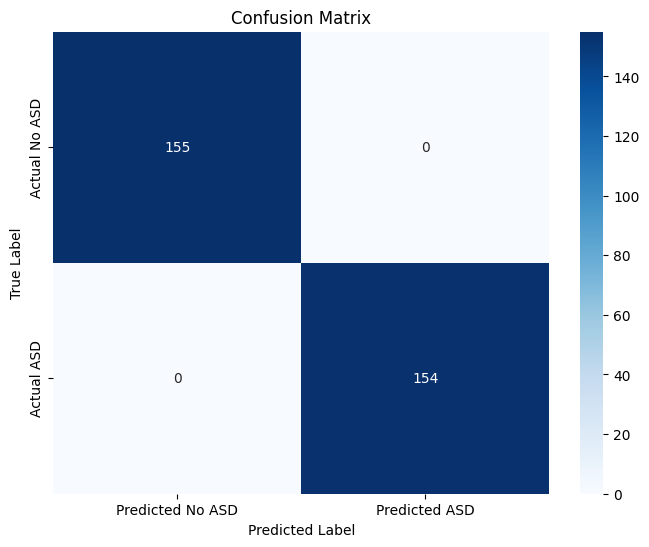

In [ ]:
#visualisation of confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'conf_matrix' is your confusion matrix variable
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No ASD', 'Predicted ASD'],
            yticklabels=['Actual No ASD', 'Actual ASD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#crossvalidation
from sklearn.model_selection import cross_val_score, StratifiedKFold
n_splits = 5

stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm_classifier, X_scaled, target, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


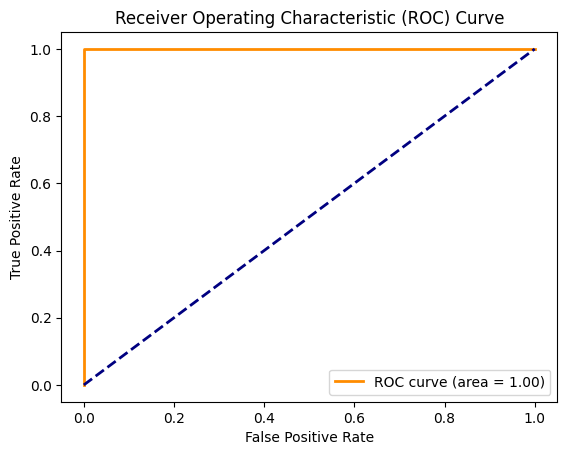

In [ ]:
# aoc-roc curve

from sklearn.metrics import roc_curve, auc

y_pred_proba = svm_classifier.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#@title Autism Screening Prediction


age = 27 #@param {type:"number"}
gender = "f" #@param ["m", "f"]
ethnicity = "Black" #@param ["White-European", "Latino", "Others", "Black", "Asian", "Middle Eastern "]
jaundice = "yes" #@param ["yes", "no"]
autism = "yes" #@param ["yes", "no"]
country_of_res = "Australia" #@param ["United States", "United Kingdom", "Australia", "India", "Canada", "Brazil", "Egypt", "Italy", "China", "France"]
used_app_before = "yes" #@param ["yes", "no"]
relation = "Others" #@param ["Self", "Parent", "Relative", "Others"]
result = 6 #@param {type:"number"}
a1 = 0 #@param {type:"integer"}
a2 = 1 #@param {type:"integer"}
a3 = 1 #@param {type:"integer"}
a4 = 1 #@param {type:"integer"}
a5 = 1 #@param {type:"integer"}
a6 = 0 #@param {type:"integer"}
a7 = 0 #@param {type:"integer"}
a8 = 0 #@param {type:"integer"}
a9 = 1 #@param {type:"integer"}
a10 = 1 #@param {type:"integer"}




user_input = pd.DataFrame({
    'age': [age],
    'gender': [gender],
    'ethnicity': [ethnicity],
    'jaundice': [jaundice],
    'autism': [autism],
    'contry_of_res': [country_of_res],
    'used_app_before': [used_app_before],
    'relation': [relation],
    'result': [result],
    'A1_Score': [a1],
    'A2_Score': [a2],
    'A3_Score': [a3],
    'A4_Score': [a4],
    'A5_Score': [a5],
    'A6_Score': [a6],
    'A7_Score': [a7],
    'A8_Score': [a8],
    'A9_Score': [a9],
    'A10_Score': [a10]
})


# Create a LabelEncoder object
le = LabelEncoder()


for column in user_input.columns:
  if user_input[column].dtype == object:
    # Fit the LabelEncoder on the unique values in the column
    le.fit(user_input[column].unique())
    # Transform the column using the fitted LabelEncoder
    user_input[column] = le.transform(user_input[column])


user_input_scaled = scaler.transform(user_input[selected_features_fisher])
prediction = svm_classifier.predict(user_input_scaled)


if prediction[0] == 1:
  print("The patient has Autism Spectrum Disorder.")
else:
  print("The patient has no Autism Spectrum Disorder.")



The patient has no Autism Spectrum Disorder.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Function to calculate the result as the sum of A1-A10 scores
def calculate_result(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10):
    return a1 + a2 + a3 + a4 + a5 + a6 + a7 + a8 + a9 + a10

# Input parameters
age = 27 #@param {type:"number"}
gender = "f" #@param ["m", "f"]
ethnicity = "Black" #@param ["White-European", "Latino", "Others", "Black", "Asian", "Middle Eastern"]
jaundice = "yes" #@param ["yes", "no"]
autism = "yes" #@param ["yes", "no"]
country_of_res = "Australia" #@param ["United States", "United Kingdom", "Australia", "India", "Canada", "Brazil", "Egypt", "Italy", "China", "France"]
used_app_before = "yes" #@param ["yes", "no"]
relation = "Others" #@param ["Self", "Parent", "Relative", "Others"]
a1 = 1 #@param {type:"integer"}
a2 = 1 #@param {type:"integer"}
a3 = 1 #@param {type:"integer"}
a4 = 1 #@param {type:"integer"}
a5 = 1 #@param {type:"integer"}
a6 = 0 #@param {type:"integer"}
a7 = 0 #@param {type:"integer"}
a8 = 0 #@param {type:"integer"}
a9 = 1 #@param {type:"integer"}
a10 = 1 #@param {type:"integer"}

# Calculate result based on A1-A10 inputs
result = calculate_result(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10)

# Create a DataFrame with user inputs, including dynamically calculated result
user_input = pd.DataFrame({
    'age': [age],
    'gender': [gender],
    'ethnicity': [ethnicity],
    'jaundice': [jaundice],
    'autism': [autism],
    'country_of_res': [country_of_res],
    'used_app_before': [used_app_before],
    'relation': [relation],
    'result': [result],  # Result is the sum of A1-A10 scores
    'A1_Score': [a1],
    'A2_Score': [a2],
    'A3_Score': [a3],
    'A4_Score': [a4],
    'A5_Score': [a5],
    'A6_Score': [a6],
    'A7_Score': [a7],
    'A8_Score': [a8],
    'A9_Score': [a9],
    'A10_Score': [a10]
})

# Encode categorical variables
le = LabelEncoder()
for column in user_input.columns:
    if user_input[column].dtype == object:
        le.fit(user_input[column].unique())
        user_input[column] = le.transform(user_input[column])

# Scale and predict (ensure `scaler` and `svm_classifier` are defined and trained)
user_input_scaled = scaler.transform(user_input[selected_features_fisher])
prediction = svm_classifier.predict(user_input_scaled)

# Output prediction
if prediction[0] == 1:
    print("The patient has Autism Spectrum Disorder.")
else:
    print("The patient has no Autism Spectrum Disorder.")




The patient has Autism Spectrum Disorder.
